## Spatial Contiguity

Comparing changes in spatial contiguity using nonplanarenforced raw and planar enforced cleaned Data , before and after application of`geoplanar`. For this notebook we will use the data files generated from level 1 administrated data. 
We will estimate both cases of Rook and Queen Contiguity on each set of data.

In [93]:
import geoplanar
import geopandas as gpd
import numpy as np

In [94]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import libpysal

### Data Retrieval

In [9]:
npe = gpd.read_parquet("nonplanar_enforced.parquet") #non planar enforced data
npe.head()

,level_0,geometry,COUNTRY,index,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,60,"POLYGON ((-89.56835 47.99815, -89.53059 48.001...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
1,64,"POLYGON ((-82.46070 42.90598, -82.46270 42.895...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
2,65,"POLYGON ((-82.92947 42.36300, -82.87499 42.458...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
3,0,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615...",US,0.0,20.750,34.956,1.0,1.0,Washington,53,...,None,None,None,None,None,None,None,None,None,None
4,1,"POLYGON ((-111.47463 44.70224, -111.48001 44.6...",US,1.0,45.132,34.527,2.0,2.0,Montana,30,...,None,None,None,None,None,None,None,None,None,None


In [10]:
npe.shape

(64, 22)

In [6]:
npe.columns

Index(['index', 'AREA', 'PERIMETER', 'STATE_', 'STATE_ID', 'STATE_NAME',
       'STATE_FIPS', 'SUB_REGION', 'STATE_ABBR', 'geometry', 'COUNTRY',
       'GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1'],
      dtype='object')

In [7]:
pe = gpd.read_parquet("planar_enforced.parquet") # planar enforced
pe.head()

,level_0,geometry,COUNTRY,index,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,60,"POLYGON ((-89.39987 47.98665, -89.34513 47.971...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
1,64,"POLYGON ((-82.46070 42.90598, -82.46270 42.895...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
2,65,"POLYGON ((-82.92947 42.36300, -82.87499 42.458...",LAKE,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,None,None,None,None
3,0,"MULTIPOLYGON (((-122.45316 48.12867, -122.3600...",US,0.0,20.750,34.956,1.0,1.0,Washington,53,...,None,None,None,None,None,None,None,None,None,None
4,1,"POLYGON ((-111.45853 44.53800, -111.48178 44.5...",US,1.0,45.132,34.527,2.0,2.0,Montana,30,...,None,None,None,None,None,None,None,None,None,None


In [8]:
pe.shape

(64, 22)

## Checking for Contiguity

A contiguous pair of spatial objects are those who share a common border. There can be different ways that objects can share a common border. 

We can check by using two types of contiguity/adjacency Rook and Queen. 

- **Rook Contiguity Case** (Requires pair of polygons to share an edge)

- **Queen Contiguity Case** (Requires pair of polygons only share one or more vertices)



In [11]:
import libpysal
from libpysal.weights import Queen, Rook
import pandas

## 1. Rook Contiguity

Here we will compare the rook contiguity of the raw(nonplanar enforcd) and cleaned(planar enforced) datatsets.

In [12]:
wr_npe = Rook.from_dataframe(npe)

In [13]:
wr_pe = Rook.from_dataframe(pe)

In [14]:
wr_npe.n

64

In [15]:
wr_pe.n

64

### Non-Zero Entries

In [16]:
# non-zero entries
wr_npe.nonzero

260

In [17]:
wr_pe.nonzero

294

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

### Number of Joins

In [21]:
# number of joins
wr_npe.s0

260.0

In [22]:
wr_pe.s0

294.0

### Measure of the Density of the Spatial Weights Matrix

In [23]:

wr_npe.pct_nonzero

6.34765625

In [24]:
wr_pe.pct_nonzero

7.177734375

### Neighbors of Location Zero

In [25]:
# the first location in raw data has two neighbors at locations 10 and 7
wr_npe.neighbors[0] 

[50, 23, 9, 59, 28, 12]

In [26]:
npe['STATE_NAME'][[50, 23, 9, 59, 28, 12]] # these are the names

50     Michigan
23      Indiana
9     Wisconsin
59         None
28     Illinois
12    Minnesota
Name: STATE_NAME, dtype: object

In [27]:
# the first location in clean data three neighbors at locations [50, 23, 9, 59, 28, 12]

wr_pe.neighbors[0] 

[50, 23, 9, 59, 28, 12]

In [28]:
npe['STATE_NAME'][[50, 23, 9, 59, 28, 12]] # belongs to Canada

50     Michigan
23      Indiana
9     Wisconsin
59         None
28     Illinois
12    Minnesota
Name: STATE_NAME, dtype: object

Lets see who are the neighbors for each observation

### Neighbors for Each Observation

In [29]:
# neighbors for each observation non planar enforced
wr_npe.neighbors

{0: [50, 23, 9, 59, 28, 12],
 1: [59],
 2: [50, 59],
 3: [10, 13],
 4: [8, 10, 6, 7],
 5: [14],
 6: [4, 12, 7],
 7: [17, 4, 6, 8, 12, 15],
 8: [32, 17, 4, 7, 25, 10],
 9: [0, 50, 28, 12, 15],
 10: [3, 4, 8, 25, 13, 24],
 11: [16, 18, 14],
 12: [0, 6, 7, 9, 15],
 13: [24, 26, 10, 3],
 14: [16, 11, 5],
 15: [17, 36, 7, 9, 12, 28],
 16: [18, 20, 21, 11, 14],
 17: [32, 34, 36, 7, 8, 15],
 18: [16, 19, 20, 22, 11],
 19: [18, 22, 27, 29, 30, 31],
 20: [16, 18, 21],
 21: [16, 20],
 22: [18, 19, 29],
 23: [0, 33, 50, 27, 28],
 24: [10, 37, 25, 26, 13],
 25: [32, 37, 8, 24, 10],
 26: [24, 13, 37],
 27: [33, 50, 19, 23, 30],
 28: [0, 33, 36, 23, 9, 15],
 29: [19, 22, 31],
 30: [33, 19, 35, 27, 31],
 31: [19, 35, 29, 30],
 32: [17, 34, 38, 8, 25, 42],
 33: [35, 36, 23, 40, 27, 28, 30],
 34: [32, 17, 36, 38],
 35: [33, 39, 40, 30, 31],
 36: [33, 34, 38, 40, 15, 47, 17, 28],
 37: [24, 25, 26, 42],
 38: [32, 34, 36, 41, 42, 47],
 39: [40, 35, 45, 46],
 40: [33, 35, 36, 39, 43, 44, 45, 47],
 41: [48,

In [30]:
# neighbors for each observation planar enforced data
wr_pe.neighbors

{0: [50, 23, 9, 59, 28, 12],
 1: [50, 59],
 2: [50, 59],
 3: [10, 52, 13],
 4: [51, 6, 7, 8, 10],
 5: [61, 54, 14],
 6: [51, 4, 53, 7, 12, 62],
 7: [17, 4, 6, 8, 12, 15],
 8: [32, 17, 4, 7, 25, 10],
 9: [0, 50, 28, 12, 15],
 10: [3, 4, 8, 13, 51, 52, 24, 25],
 11: [16, 18, 61, 14],
 12: [0, 53, 6, 7, 9, 59, 15],
 13: [24, 26, 10, 3],
 14: [16, 61, 11, 5],
 15: [17, 36, 7, 9, 12, 28],
 16: [18, 20, 21, 11, 14],
 17: [32, 34, 36, 7, 8, 15],
 18: [16, 19, 20, 22, 11, 27, 59],
 19: [18, 22, 27, 29, 30, 31],
 20: [16, 18, 21],
 21: [16, 20],
 22: [18, 19, 29],
 23: [0, 33, 50, 27, 28],
 24: [10, 37, 25, 26, 13],
 25: [32, 37, 8, 24, 10],
 26: [24, 13, 37],
 27: [33, 18, 19, 50, 23, 59, 30],
 28: [0, 33, 36, 23, 9, 15],
 29: [19, 22, 31],
 30: [33, 19, 35, 27, 31],
 31: [35, 19, 29, 30],
 32: [17, 34, 38, 8, 25, 42],
 33: [35, 36, 23, 40, 27, 28, 30],
 34: [32, 17, 36, 38],
 35: [33, 39, 40, 30, 31],
 36: [33, 34, 38, 40, 15, 47, 17, 28],
 37: [24, 25, 26, 42],
 38: [32, 34, 36, 41, 42, 47],

### Full Neighbor Matrix

In [97]:
import pandas as pd

In [98]:
pd.DataFrame(*wr_npe.full()).astype(int) # non planar enforced rook 

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [99]:
pd.DataFrame(*wr_pe.full()).astype(int) # planar enforced rook 

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
62,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Weight Values

In [100]:
wr_npe.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0],
 2: [1.0, 1.0],
 3: [1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0],
 5: [1.0],
 6: [1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0],
 21: [1.0, 1.0],
 22: [1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0],
 35: [1.0,

In [101]:
wr_pe.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0],
 2: [1.0, 1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0],
 21: [1.0, 1.0],
 22: [1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0, 

### Number of Neighbors for Each Observation

In [102]:
# number of neighbors for each observation
wr_npe.cardinalities

{0: 6,
 1: 1,
 2: 2,
 3: 2,
 4: 4,
 5: 1,
 6: 3,
 7: 6,
 8: 6,
 9: 5,
 10: 6,
 11: 3,
 12: 5,
 13: 4,
 14: 3,
 15: 6,
 16: 5,
 17: 6,
 18: 5,
 19: 6,
 20: 3,
 21: 2,
 22: 3,
 23: 5,
 24: 5,
 25: 5,
 26: 3,
 27: 5,
 28: 6,
 29: 3,
 30: 5,
 31: 4,
 32: 6,
 33: 7,
 34: 4,
 35: 5,
 36: 8,
 37: 4,
 38: 6,
 39: 4,
 40: 8,
 41: 4,
 42: 4,
 43: 4,
 44: 4,
 45: 5,
 46: 2,
 47: 6,
 48: 3,
 49: 2,
 50: 5,
 51: 3,
 52: 3,
 53: 3,
 54: 2,
 55: 1,
 56: 5,
 57: 1,
 58: 3,
 59: 5,
 60: 0,
 61: 4,
 62: 3,
 63: 2}

In [32]:
wr_pe.cardinalities

{0: 6,
 1: 2,
 2: 2,
 3: 3,
 4: 5,
 5: 3,
 6: 6,
 7: 6,
 8: 6,
 9: 5,
 10: 8,
 11: 4,
 12: 7,
 13: 4,
 14: 4,
 15: 6,
 16: 5,
 17: 6,
 18: 7,
 19: 6,
 20: 3,
 21: 2,
 22: 3,
 23: 5,
 24: 5,
 25: 5,
 26: 3,
 27: 7,
 28: 6,
 29: 3,
 30: 5,
 31: 4,
 32: 6,
 33: 7,
 34: 4,
 35: 5,
 36: 8,
 37: 4,
 38: 6,
 39: 4,
 40: 8,
 41: 4,
 42: 4,
 43: 4,
 44: 4,
 45: 5,
 46: 2,
 47: 6,
 48: 3,
 49: 2,
 50: 6,
 51: 6,
 52: 5,
 53: 5,
 54: 3,
 55: 1,
 56: 5,
 57: 1,
 58: 3,
 59: 8,
 60: 0,
 61: 7,
 62: 4,
 63: 2}

### Overview of the Distribution of the Cardinalities

In [33]:
# overview of the distribution of these cardinalities
wr_npe.histogram

[(0, 1), (1, 4), (2, 7), (3, 13), (4, 11), (5, 14), (6, 11), (7, 1), (8, 2)]

In [34]:
# overview of the distribution of these cardinalities
wr_pe.histogram

[(0, 1), (1, 2), (2, 6), (3, 9), (4, 12), (5, 12), (6, 13), (7, 5), (8, 4)]

The cardinalities and histogram attributes help quickly spot asymmetries in the number of neighbors

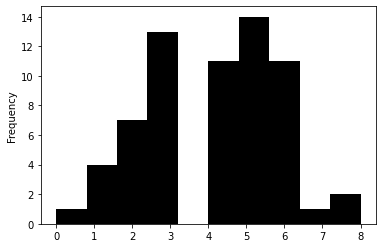

In [35]:
pandas.Series(wr_npe.cardinalities).plot.hist(color='k');

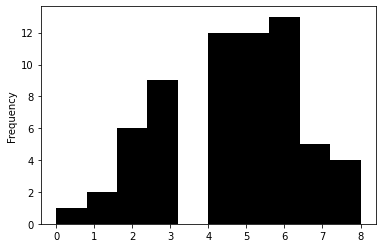

In [36]:
pandas.Series(wr_pe.cardinalities).plot.hist(color='k');

<AxesSubplot:ylabel='Frequency'>

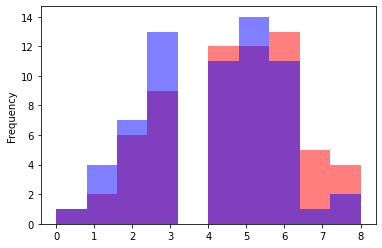

In [104]:
pandas.Series(wr_pe.cardinalities).plot.hist(color='r', alpha=0.5)
pandas.Series(wr_npe.cardinalities).plot.hist(color='b', alpha=0.5)



(-140.0, -60.0, 25.0, 65.0)

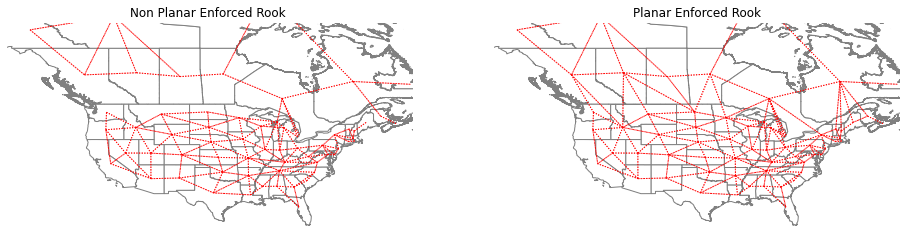

In [116]:
import numpy as np
f,ax = plt.subplots(1,2,figsize=(16, 16), subplot_kw=dict(aspect='equal'))
npe.plot(edgecolor='grey', facecolor='w', ax=ax[0])
wr_npe.plot(npe, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Non Planar Enforced Rook ')
ax[0].axis(np.asarray([-140, -60, 25, 65]))

ax[0].axis('off')
pe.plot(edgecolor='grey', facecolor='w', ax=ax[1])
wr_pe.plot(pe, ax=ax[1],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('Planar Enforced Rook')
ax[1].axis('off')
ax[1].axis(np.asarray([-140, -60, 25, 65]))

## 2.Queen contiguity

Now we apply the same steps to raw and clean data to test queen contiguity.

In [38]:
wq_npe = Queen.from_dataframe(npe)

In [39]:
wq_pe= Queen.from_dataframe(pe)

In [40]:
wq_pe.n

64

In [41]:
wq_npe.n

64

In [42]:
wq_npe.n == wr_npe.n # queen is same as rook in raw data

True

In [43]:
wq_pe.n == wr_pe.n # queen is same as rook in raw data

True

###  Non-zero entries

In [44]:
# non-zero entries
wq_npe.nonzero

272

In [45]:
# non-zero entries
wq_pe.nonzero

306

### Number of Joins

In [46]:
# number of joins
wq_npe.s0

272.0

In [47]:
# number of joins
wq_pe.s0

306.0

### Neighbors for each observation

In [48]:
# neighbors for each observation
wq_pe.neighbors

{0: [50, 23, 9, 59, 12, 28],
 1: [50, 59],
 2: [50, 59],
 3: [10, 52, 13],
 4: [51, 6, 7, 8, 10],
 5: [61, 54, 14],
 6: [51, 4, 53, 7, 12, 62],
 7: [17, 4, 6, 8, 12, 15],
 8: [32, 17, 4, 7, 25, 10],
 9: [0, 50, 28, 12, 15],
 10: [3, 4, 8, 13, 51, 52, 24, 25],
 11: [16, 18, 61, 14],
 12: [0, 53, 6, 7, 9, 59, 15],
 13: [24, 10, 26, 3],
 14: [16, 61, 11, 5],
 15: [17, 36, 7, 9, 12, 28],
 16: [18, 20, 21, 11, 14],
 17: [32, 34, 36, 7, 8, 15],
 18: [59, 11, 16, 19, 20, 22, 27, 61],
 19: [18, 22, 27, 29, 30, 31],
 20: [16, 18, 21],
 21: [16, 20],
 22: [18, 19, 29],
 23: [0, 33, 50, 27, 28],
 24: [26, 37, 25, 10, 13],
 25: [32, 42, 37, 8, 24, 10],
 26: [24, 13, 37],
 27: [33, 18, 19, 50, 23, 59, 30],
 28: [0, 33, 36, 23, 9, 15],
 29: [19, 22, 31],
 30: [33, 19, 35, 27, 31],
 31: [19, 35, 29, 30],
 32: [17, 34, 37, 38, 8, 25, 42],
 33: [35, 36, 23, 40, 27, 28, 30],
 34: [32, 17, 36, 38],
 35: [33, 39, 40, 30, 31],
 36: [33, 34, 38, 40, 15, 47, 17, 28],
 37: [32, 42, 24, 25, 26],
 38: [32, 34, 

In [49]:
# neighbors for each observation
wq_npe.neighbors

{0: [50, 23, 9, 59, 12, 28],
 1: [50, 59],
 2: [50, 59],
 3: [10, 13],
 4: [51, 6, 7, 8, 10],
 5: [14],
 6: [4, 12, 7],
 7: [17, 4, 6, 8, 12, 15],
 8: [32, 17, 4, 7, 25, 10],
 9: [0, 50, 28, 12, 15],
 10: [3, 4, 8, 24, 13, 25],
 11: [16, 18, 14],
 12: [0, 6, 7, 9, 15],
 13: [24, 10, 26, 3],
 14: [16, 11, 5],
 15: [17, 36, 7, 9, 12, 28],
 16: [18, 20, 21, 11, 14],
 17: [32, 34, 36, 7, 8, 15],
 18: [16, 19, 20, 22, 11],
 19: [18, 22, 27, 29, 30, 31],
 20: [16, 18, 21],
 21: [16, 20],
 22: [18, 19, 29],
 23: [0, 33, 50, 27, 28],
 24: [26, 37, 25, 10, 13],
 25: [32, 42, 37, 8, 24, 10],
 26: [24, 13, 37],
 27: [33, 50, 19, 23, 30],
 28: [0, 33, 36, 23, 9, 15],
 29: [19, 22, 31],
 30: [33, 19, 35, 27, 31],
 31: [19, 35, 29, 30],
 32: [17, 34, 37, 38, 8, 25, 42],
 33: [35, 36, 23, 40, 27, 28, 30],
 34: [32, 17, 36, 38],
 35: [33, 39, 40, 30, 31],
 36: [33, 34, 38, 40, 15, 47, 17, 28],
 37: [32, 42, 24, 25, 26],
 38: [32, 34, 36, 41, 42, 47],
 39: [40, 35, 45, 46],
 40: [33, 35, 36, 39, 43, 44

In [50]:
pe['NAME_1'][[8, 13, 16, 17, 19, 56, 24, 58]]

8                      None
13                     None
16                     None
17                     None
19                     None
56    Northwest Territories
24                     None
58                  Nunavut
Name: NAME_1, dtype: object

In [51]:
pe['STATE_NAME'][[8, 13, 16, 17, 19, 56, 24, 58]]

8           Wyoming
13           Oregon
16    Massachusetts
17         Nebraska
19     Pennsylvania
56             None
24           Nevada
58             None
Name: STATE_NAME, dtype: object

In [52]:
pe['STATE_NAME'][[2, 51, 52, 55, 8, 56, 11]]

2        None
51       None
52       None
55       None
8     Wyoming
56       None
11    Vermont
Name: STATE_NAME, dtype: object

In [53]:
pe['NAME_1'][[2, 51, 52, 55, 8, 56, 11]]

2                          None
51                      Alberta
52             British Columbia
55    Newfoundland and Labrador
8                          None
56        Northwest Territories
11                         None
Name: NAME_1, dtype: object

### Measure of the density of the spatial weights matrix

In [54]:
# measure of the density of the spatial weights matrix
wq_npe.pct_nonzero


6.640625

In [55]:
# measure of the density of the spatial weights matrix
wq_pe.pct_nonzero

7.470703125

In [56]:
(wq_npe.pct_nonzero > wr_npe.pct_nonzero) == (wq_npe.n == wr_npe.n)

True

### Full neighbor matrix

In [105]:
pd.DataFrame(*wq_npe.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [106]:
pd.DataFrame(*wq_pe.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
62,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


### Weight values

In [107]:
wq_npe.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0],
 2: [1.0, 1.0],
 3: [1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0],
 6: [1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0],
 21: [1.0, 1.0],
 22: [1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1

In [108]:
wq_pe.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0],
 2: [1.0, 1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0],
 21: [1.0, 1.0],
 22: [1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 

### Number of neighbors for each observation

In [59]:
# number of neighbors for each observation
wq_npe.cardinalities

{0: 6,
 1: 2,
 2: 2,
 3: 2,
 4: 5,
 5: 1,
 6: 3,
 7: 6,
 8: 6,
 9: 5,
 10: 6,
 11: 3,
 12: 5,
 13: 4,
 14: 3,
 15: 6,
 16: 5,
 17: 6,
 18: 5,
 19: 6,
 20: 3,
 21: 2,
 22: 3,
 23: 5,
 24: 5,
 25: 6,
 26: 3,
 27: 5,
 28: 6,
 29: 3,
 30: 5,
 31: 4,
 32: 7,
 33: 7,
 34: 4,
 35: 5,
 36: 8,
 37: 5,
 38: 6,
 39: 4,
 40: 8,
 41: 4,
 42: 5,
 43: 4,
 44: 4,
 45: 5,
 46: 2,
 47: 6,
 48: 3,
 49: 2,
 50: 6,
 51: 4,
 52: 3,
 53: 4,
 54: 2,
 55: 1,
 56: 6,
 57: 1,
 58: 4,
 59: 5,
 60: 0,
 61: 4,
 62: 4,
 63: 2}

In [60]:
# number of neighbors for each observation
wq_pe.cardinalities

{0: 6,
 1: 2,
 2: 2,
 3: 3,
 4: 5,
 5: 3,
 6: 6,
 7: 6,
 8: 6,
 9: 5,
 10: 8,
 11: 4,
 12: 7,
 13: 4,
 14: 4,
 15: 6,
 16: 5,
 17: 6,
 18: 8,
 19: 6,
 20: 3,
 21: 2,
 22: 3,
 23: 5,
 24: 5,
 25: 6,
 26: 3,
 27: 7,
 28: 6,
 29: 3,
 30: 5,
 31: 4,
 32: 7,
 33: 7,
 34: 4,
 35: 5,
 36: 8,
 37: 5,
 38: 6,
 39: 4,
 40: 8,
 41: 4,
 42: 5,
 43: 4,
 44: 4,
 45: 5,
 46: 2,
 47: 6,
 48: 3,
 49: 2,
 50: 7,
 51: 6,
 52: 5,
 53: 6,
 54: 3,
 55: 1,
 56: 6,
 57: 1,
 58: 4,
 59: 9,
 60: 0,
 61: 8,
 62: 5,
 63: 2}

### Overview of the distribution of these cardinalities

In [61]:
# overview of the distribution of these cardinalities
wq_npe.histogram

[(0, 1), (1, 3), (2, 8), (3, 9), (4, 12), (5, 14), (6, 13), (7, 2), (8, 2)]

In [62]:
# overview of the distribution of these cardinalities
wq_pe.histogram

[(0, 1),
 (1, 2),
 (2, 6),
 (3, 8),
 (4, 10),
 (5, 12),
 (6, 14),
 (7, 5),
 (8, 5),
 (9, 1)]

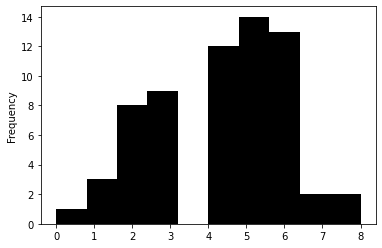

In [63]:
pandas.Series(wq_npe.cardinalities).plot.hist(color='k');

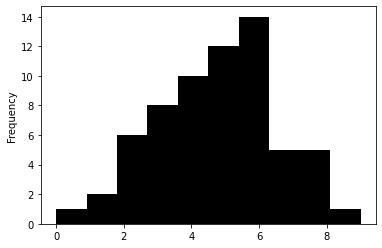

In [64]:
pandas.Series(wq_pe.cardinalities).plot.hist(color='k'); # clean data Queens neighbors

<AxesSubplot:ylabel='Frequency'>

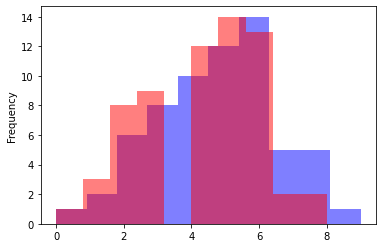

In [109]:
pandas.Series(wq_pe.cardinalities).plot.hist(color='b',alpha=0.5)
pandas.Series(wq_npe.cardinalities).plot.hist(color='r',alpha=0.5)
;# clean data Rooks neighbors

The blue bars represent the data after application of geoplanar and the red bars represent queen neighbors of the before we fixed the issues. 



In [66]:
c9 = [idx for idx,c in wq_npe.cardinalities.items() if c==9]

In [70]:
npe['STATE_NAME'][50]

'Michigan'

In [71]:
wr_npe.neighbors[50]

[0, 2, 23, 9, 27]

In [72]:
wq_pe.neighbors[50]

[0, 1, 2, 23, 27, 9, 59]

(-140.0, -70.0, 25.0, 70.0)

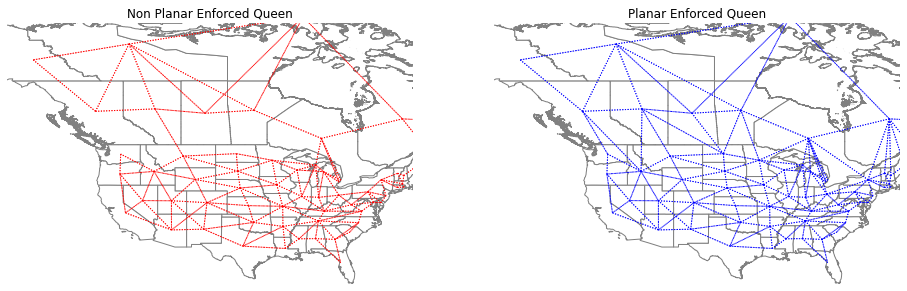

In [113]:
import numpy as np
f,ax = plt.subplots(1,2,figsize=(16, 16), subplot_kw=dict(aspect='equal'))
npe.plot(edgecolor='grey', facecolor='w', ax=ax[0])
wq_npe.plot(npe, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Non Planar Enforced Queen')
ax[0].axis(np.asarray([-140, -70, 25, 70]))

ax[0].axis('off')
pe.plot(edgecolor='grey', facecolor='w', ax=ax[1])
wq_pe.plot(pe, ax=ax[1],
        edge_kws=dict(color='b', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('Planar Enforced Queen')
ax[1].axis('off')
ax[1].axis(np.asarray([-140, -70, 25, 70]))

These maps show Queen Contiguity for both clean and raw Data.

## Subset for Indiana

In [87]:
I_npe = npe[npe.STATE_NAME=="Indiana"] 

In [88]:
I_pe = pe[pe.STATE_NAME=="Indiana"] 

In [89]:
I_pe.geometry

23    POLYGON ((-86.34163 38.17722, -86.36437 38.193...
Name: geometry, dtype: geometry

In [90]:
I_npe.geometry

23    POLYGON ((-86.34163 38.17722, -86.36437 38.193...
Name: geometry, dtype: geometry

In [91]:
I_pe_centroid= I_pe.centroid
I_npe_centroid= I_npe.centroid

<AxesSubplot:>

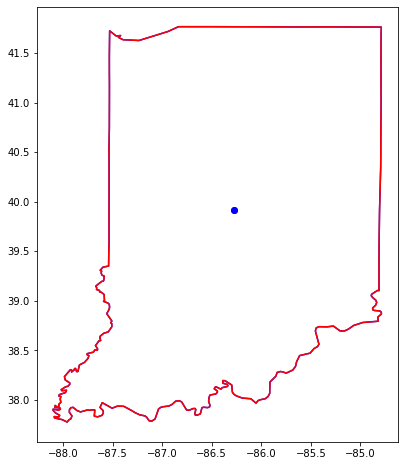

In [92]:
base =I_pe.geometry.boundary.plot(edgecolor='blue', figsize=(15, 8))
I_npe.geometry.boundary.plot(ax=base, color='red')
I_npe_centroid.plot(ax=base, color='red')
I_pe_centroid.plot(ax=base, color='blue')